In [19]:
#Import all libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as datetime
from datetime import timedelta

In [3]:
#Load the dataset
cylicist_clean = pd.read_csv('cylicist_clean.csv')
cylicist_clean.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length_time,ride_length,day_of_the week
0,B12AD6565494C368,classic_bike,09/06/2022 22:28,09/06/2022 22:52,California Ave & Milwaukee Ave,13084,California Ave & Milwaukee Ave,13084,41.922695,-87.697153,41.922695,-87.697153,casual,0:23:45,0:23:45,5
1,BAD4CB075003A605,electric_bike,19/06/2022 17:08,19/06/2022 17:08,California Ave & Milwaukee Ave,13084,California Ave & Milwaukee Ave,13084,41.922613,-87.697148,41.922695,-87.697153,casual,0:00:02,0:00:02,1
2,76DAD9FC95774B53,electric_bike,26/06/2022 23:59,27/06/2022 0:25,Burnham Greenway & 105th St,20222,Burnham Greenway & 105th St,20222,41.704628,-87.528414,41.704575,-87.528232,casual,0:25:42,0:25:42,1
3,47DE68ACCA138C13,electric_bike,27/06/2022 11:40,27/06/2022 11:50,Wood St & Chicago Ave,637,California Ave & Division St,13256,41.895611,-87.672098,41.903029,-87.697474,casual,0:09:23,0:09:23,2
4,5D899636D3334ED5,classic_bike,27/06/2022 16:01,27/06/2022 16:35,California Ave & Division St,13256,California Ave & Division St,13256,41.903029,-87.697474,41.903029,-87.697474,casual,0:34:43,0:34:43,2


In [4]:
cylicist_clean['day_of_the week'] = cylicist_clean['day_of_the week'].replace([1,2,3,4,5,6,7],['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])

In [5]:
cylicist_clean['started_at'] = pd.to_datetime(cylicist_clean['started_at'], dayfirst = True)
cylicist_clean['ended_at'] = pd.to_datetime(cylicist_clean['ended_at'], dayfirst = True)
cylicist_clean['ride_length'] = cylicist_clean['ended_at'] - cylicist_clean['started_at'] 
cylicist_clean['ride_time'] = cylicist_clean['ended_at'] - cylicist_clean['started_at']
cylicist_clean['ride_length'] = (cylicist_clean['ride_length'])/timedelta(minutes=1)

In [6]:
cylicist_clean['ride_length'] = cylicist_clean['ride_length'].abs()

In [7]:
#Max ride time
print('Maximum ride time is ',cylicist_clean['ride_length'].max())

#Minimum ride time
print('Minimum ride time is ',cylicist_clean['ride_length'].min())

#Mean ride time
print('Mean ride time is ',cylicist_clean['ride_length'].mean())


Maximum ride time is  10807.0
Minimum ride time is  0.0
Mean ride time is  18.92777665153686


In [8]:
trial = cylicist_clean.groupby('day_of_the week')['ride_id'].count()
trial

day_of_the week
Friday       126840
Monday        97611
Saturday     141410
Sunday       134507
Thursday     138104
Tuesday      107319
Wednesday    127320
Name: ride_id, dtype: int64

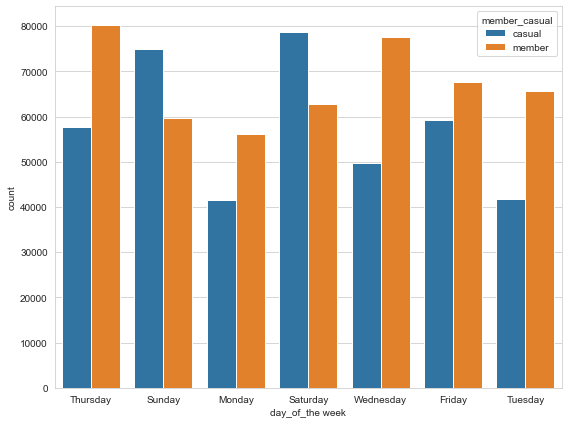

In [21]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,6))
sns.countplot(x='day_of_the week',hue='member_casual',data=cylicist_clean)
plt.tight_layout()

In [10]:
#Average ride length
average_ride = cylicist_clean.groupby(['member_casual','day_of_the week'])['ride_length'].mean()
average_ride

member_casual  day_of_the week
casual         Friday             24.071211
               Monday             25.670639
               Saturday           27.069206
               Sunday             28.601877
               Thursday           22.863945
               Tuesday            23.052245
               Wednesday          21.855586
member         Friday             13.285735
               Monday             13.024325
               Saturday           15.007121
               Sunday             15.334010
               Thursday           13.198785
               Tuesday            13.069535
               Wednesday          12.799253
Name: ride_length, dtype: float64

In [11]:
average_ride_pivot = cylicist_clean.groupby('member_casual')['ride_length'].mean()
average_ride_pivot

member_casual
casual    25.111003
member    13.618905
Name: ride_length, dtype: float64